In [1]:
import numpy as np
import PIL
import matplotlib.pyplot as plt

from skimage import filters, feature

from scipy import ndimage, misc

from matplotlib import animation

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
img = PIL.Image.open('Lenna.png')
img = img.convert('L')

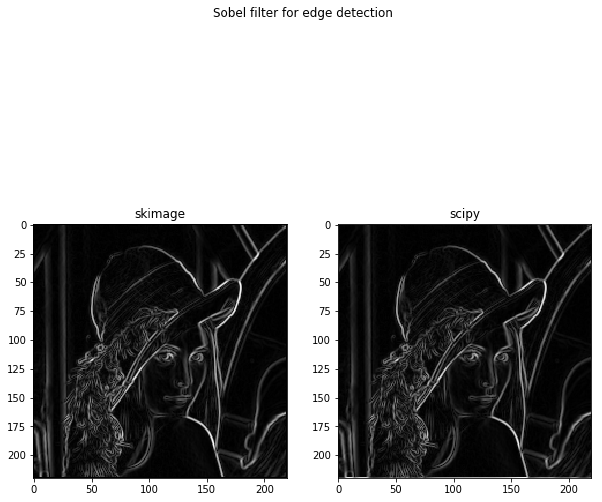

In [3]:
# Sobel filter pipeline (skimage)
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(10, 10))
f.suptitle('Sobel filter for edge detection')
sob_skimg = filters.sobel(img)
ax1.imshow(sob_skimg, cmap = 'gray')
ax1.set_title('skimage')

sx = ndimage.sobel(np.array(img, dtype=int), axis=0, mode='constant')
sy = ndimage.sobel(np.array(img, dtype=int), axis=1, mode='constant')
sob_skimg = np.hypot(sx, sy)
ax2.imshow(sob_skimg, cmap = 'gray')
ax2.set_title('scipy')
plt.show()

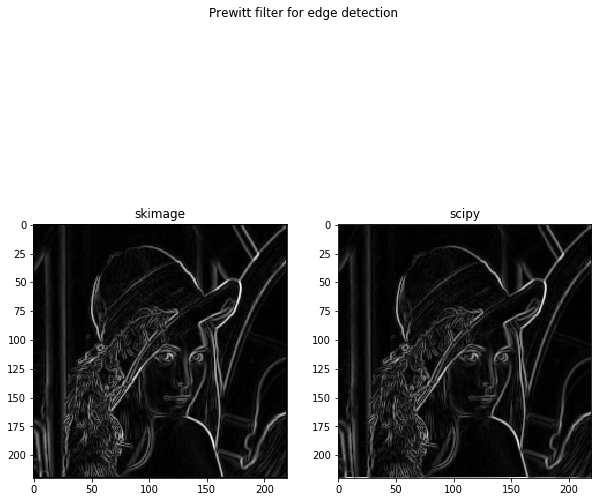

In [4]:
# Prewitt filter pipeline (skimage)
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(10, 10))
f.suptitle('Prewitt filter for edge detection')
pr_skimg = filters.prewitt(img)
ax1.imshow(pr_skimg, cmap = 'gray')
ax1.set_title('skimage')

sx = ndimage.prewitt(np.array(img, dtype=int), axis=0, mode='constant')
sy = ndimage.prewitt(np.array(img, dtype=int), axis=1, mode='constant')
sob_skimg = np.hypot(sx, sy)
ax2.imshow(sob_skimg, cmap = 'gray')
ax2.set_title('scipy')
plt.show()

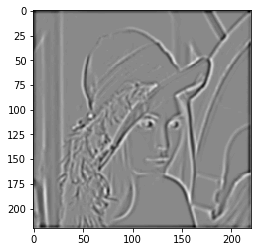

In [5]:
# LoG
sx = ndimage.gaussian_laplace(np.array(img, dtype=int), mode='constant', sigma=1.5)

fig = plt.figure()

plt.imshow(sx, cmap = 'gray')
plt.show()

In [6]:
log_result = np.zeros(img.size)
def f(s1, s2):
    ndimage.gaussian_laplace(img, [s1, s2], log_result)
    log_result[log_result > 0.75] = 1
    log_result[log_result <= 0.75] = 0
    plt.imshow(log_result, cmap = 'gray')
    plt.title('LoG, s1 = {}, s2 = {}'.format(s1, s2)) #, fontsize=45)
    plt.axis('off')
interact(f, s1 = (0,3,0.1), s2 = (0,3,0.1))

interactive(children=(FloatSlider(value=1.0, description='s1', max=3.0), FloatSlider(value=1.0, description='s…

<function __main__.f(s1, s2)>

In [7]:
import matplotlib

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img = matplotlib.image.imread('Lenna.png')
img = rgb2gray(img)

def f(s1):
    img1 = feature.canny(img, s1)
    plt.imshow(img1, cmap = 'gray')
    plt.title('Canny, s1 = {}'.format(s1)) #, fontsize=45)
    plt.axis('off')
interact(f, s1 = (0,3,0.1));

interactive(children=(FloatSlider(value=1.0, description='s1', max=3.0), Output()), _dom_classes=('widget-inte…